### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [93]:
sns.color_palette('Spectral')

[(0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197)]

### Loading the dataset

In [2]:
dataset_columns=['target', 'id', 'date', 'flag', 'user', 'text']
encoding = 'ISO-8859-1'
data = pd.read_csv('training.csv', encoding=encoding, names=dataset_columns)

In [3]:
data.sample(5)

,target,id,date,flag,user,text
174334,0,1964459690,Fri May 29 14:16:10 PDT 2009,NO_QUERY,Shekara,frustrated by my stupid iPhone I need a blackb...
1375819,4,2051657843,Fri Jun 05 22:30:07 PDT 2009,NO_QUERY,mdelamerced,@chradm is getting lost in Akihabara with my mom
547302,0,2202037395,Tue Jun 16 21:08:41 PDT 2009,NO_QUERY,alexalimtong,@charmabulous Yeah. Stupid internet
708331,0,2257272523,Sat Jun 20 14:04:24 PDT 2009,NO_QUERY,rickysteele,"Great game of ping pong with my son, Andrew. I..."
882155,4,1685920555,Sun May 03 02:47:19 PDT 2009,NO_QUERY,christine94,@davidcharvet Being there today youï¿½ve overc...


### Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
data.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [7]:
print('Length of the dataset:', len(data))

Length of the dataset: 1600000


In [8]:
data.shape

(1600000, 6)

In [9]:
data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [10]:
data['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

### Visualising the target variables

<AxesSubplot: title={'center': 'Distribution of data'}, xlabel='target'>

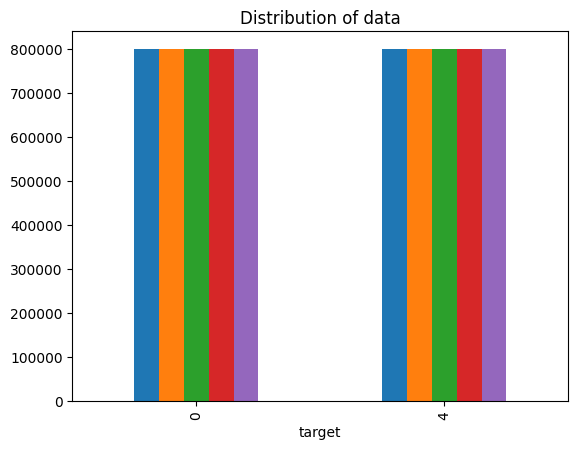

In [11]:
data.groupby('target').count().plot(kind='bar', title='Distribution of data', legend=False)

<AxesSubplot: xlabel='target', ylabel='count'>

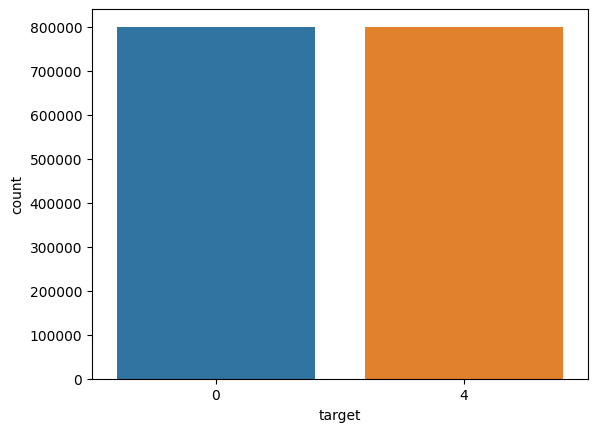

In [12]:
sns.countplot(x='target', data=data)

### Data Preprocessing

In [13]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
df = data[['text', 'target']]

In [15]:
df['target'] = df['target'].replace(4,1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28588\464709526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].replace(4,1)


In [16]:
df['target'].unique()

array([0, 1], dtype=int64)

#### Split the data by one-fourth for easy processing

In [17]:
data_pos = df[df['target']==1]
data_neg = df[df['target']==0]

In [18]:
pos = data_pos.iloc[:int(20000)]
neg = data_neg.iloc[:int(20000)]

In [19]:
dataset = pd.concat([pos, neg])

In [20]:
dataset['text'] = dataset['text'].str.lower()

In [21]:
dataset.tail()

,text,target
19995,"not much time off this weekend, work trip to m...",0
19996,one more day of holidays,0
19997,feeling so down right now .. i hate you damn h...,0
19998,"geez,i hv to read the whole book of personalit...",0
19999,i threw my sign at donnie and he bent over to ...,0


#### Define Stopwords

In [22]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further','geez','geezi', 'had', 'has', 'have','hv', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [23]:
STOPWORDS = set(stopwordlist)

#### Clean Stopwords

In [24]:
def clean_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dataset['text'] = dataset['text'].apply(lambda text: clean_stopwords(text))

In [25]:
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

#### Clean punctuations

In [26]:
import string
english_punctuations = string.punctuation

def clean_punct(text):
    translator = str.maketrans('', '', english_punctuations)
    return text.translate(translator)

dataset['text'] = dataset['text'].apply(lambda x: clean_punct(x))

In [27]:
dataset.tail()

,text,target
19995,not much time off weekend work trip malmï¿½ fr...,0
19996,one day holidays,0
19997,feeling right hate damn humprey,0
19998,geezi read whole book personality types embark...,0
19999,threw sign donnie bent over get but thingee ma...,0


#### Clean repeating characters

In [28]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))

In [29]:
dataset.tail()

,text,target
19995,not much time off weekend work trip malmï¿½ fr...,0
19996,one day holidays,0
19997,feeling right hate damn humprey,0
19998,geezi read whole book personality types embark...,0
19999,threw sign donnie bent over get but thingee ma...,0


#### Cleaning URLs

In [30]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi read whole book personality types embark...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

#### Cleaning Numbers

In [31]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi read whole book personality types embark...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

#### Tokenisation

In [32]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

#### Stemming

In [33]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

#### Lemmatizing

In [34]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

#### Separating input feature and output feature

In [58]:
dataset['text'] = dataset['text'].astype(str)

This casting of 'text' feature to string is done to prevent a later attribute 
error while applying TF-IDF Vectorizer

In [59]:
X = dataset.text
y = dataset.target

### Word Cloud

#### Negative words

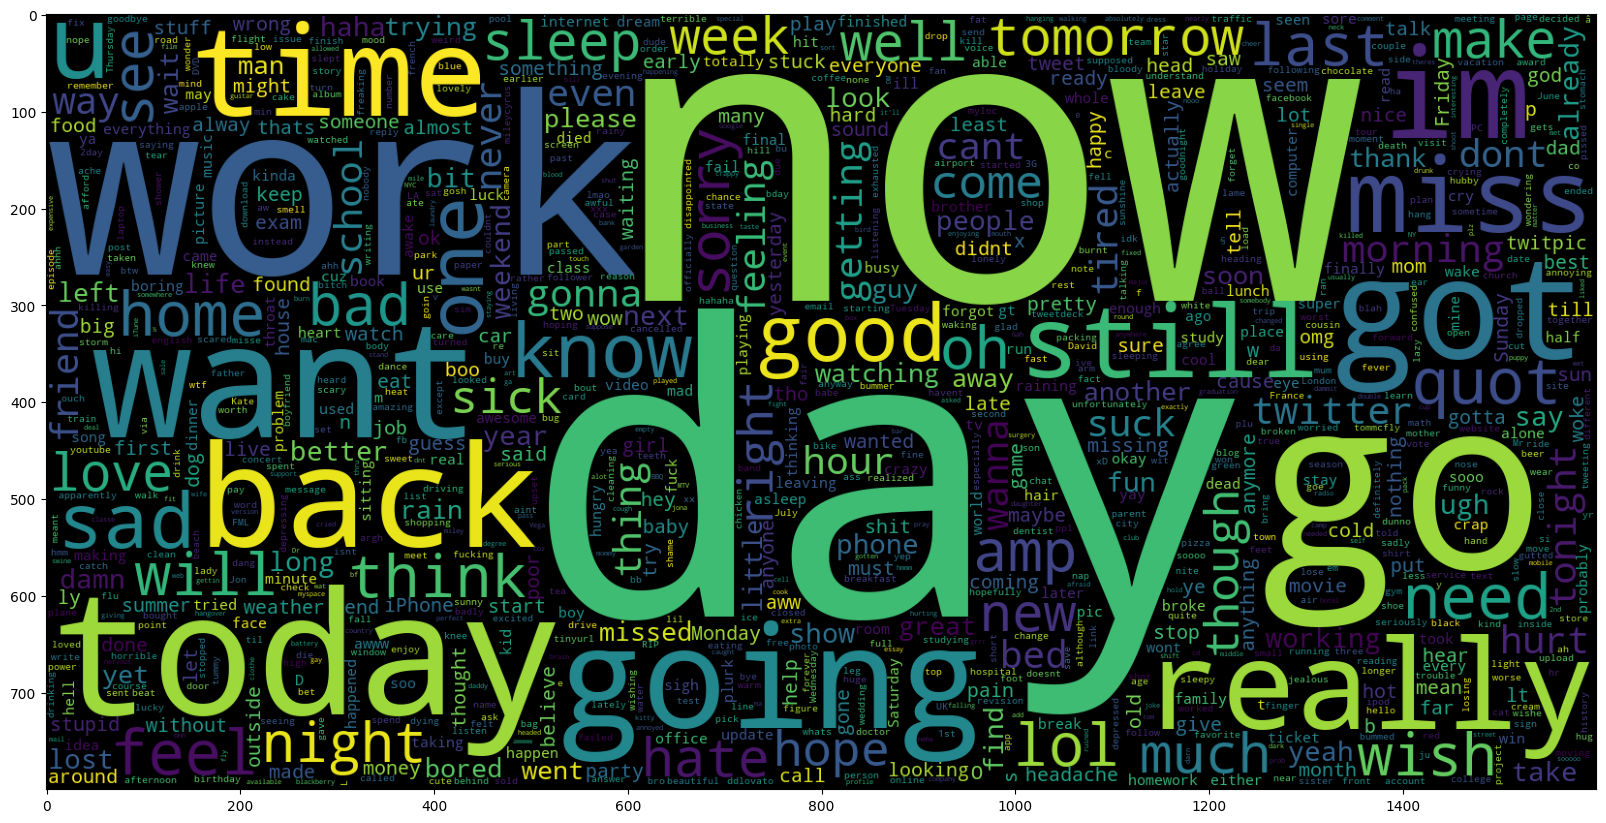

In [36]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

#### Positive words

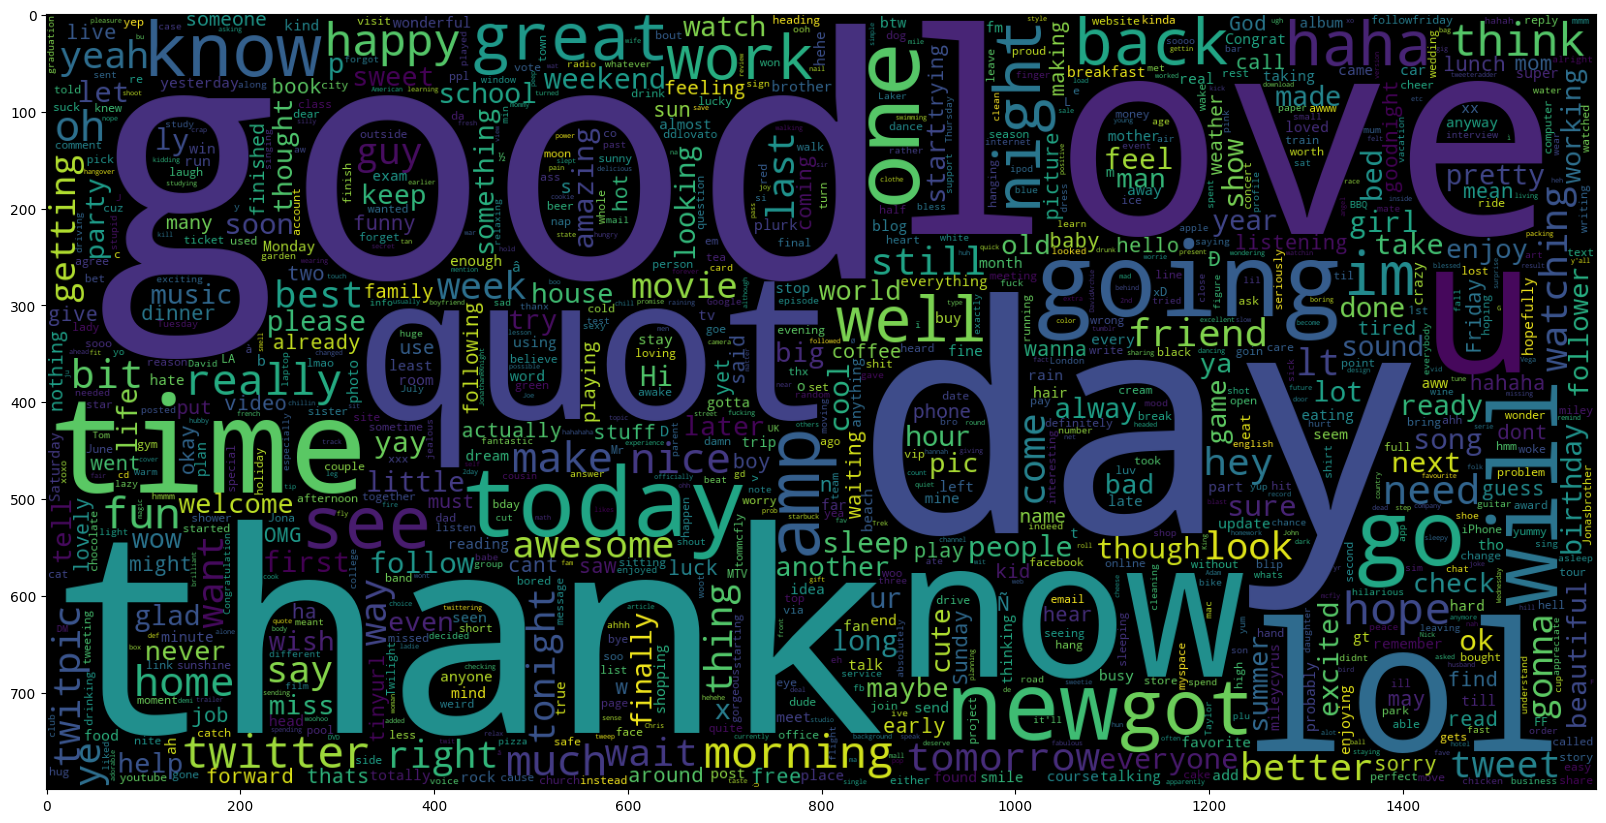

In [37]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

### Train-Test Split

In [38]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Extracting Term Frequency - Inverse Document Frequency feature

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
vectoriser = TfidfVectorizer(max_df=0.90, min_df=0.02, max_features=50000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  43


In [70]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

### Defining a function for metrics

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def model_metrics(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='')

### Model Building

#### Logistic Regression 

In [50]:
from sklearn.linear_model import LogisticRegression

In [68]:
logistic = LogisticRegression(max_iter=1000, n_jobs=-1)

In [71]:
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [72]:
y_pred = logistic.predict(X_test)

              precision    recall  f1-score   support

           0       0.64      0.51      0.57      4042
           1       0.59      0.70      0.64      3958

    accuracy                           0.61      8000
   macro avg       0.61      0.61      0.61      8000
weighted avg       0.61      0.61      0.60      8000

Accuracy:  0.60825


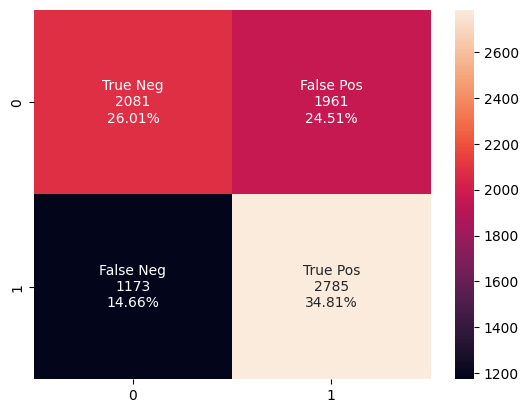

In [96]:
model_metrics(y_test, y_pred)

#### ROC Curve 

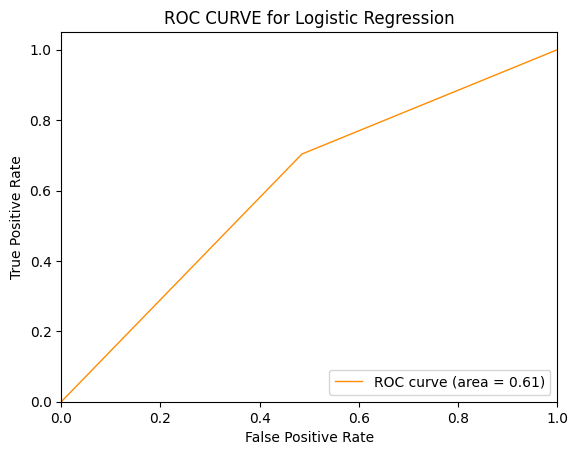

In [83]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

#### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfc = RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [86]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [87]:
y_pred_rfc = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.63      0.51      0.57      4042
           1       0.58      0.70      0.64      3958

    accuracy                           0.60      8000
   macro avg       0.61      0.60      0.60      8000
weighted avg       0.61      0.60      0.60      8000

Accuracy:  0.60375


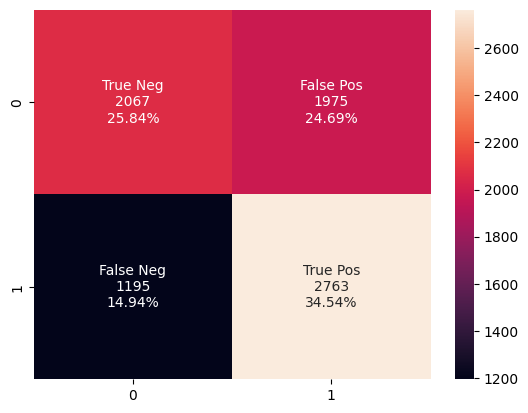

In [97]:
model_metrics(y_test, y_pred_rfc)

#### Naive Bayes

In [98]:
from sklearn.naive_bayes import MultinomialNB

In [99]:
mnb = MultinomialNB()

In [100]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [101]:
y_pred_mnb = mnb.predict(X_test)

              precision    recall  f1-score   support

           0       0.65      0.51      0.57      4042
           1       0.59      0.72      0.65      3958

    accuracy                           0.61      8000
   macro avg       0.62      0.61      0.61      8000
weighted avg       0.62      0.61      0.61      8000

Accuracy:  0.6115


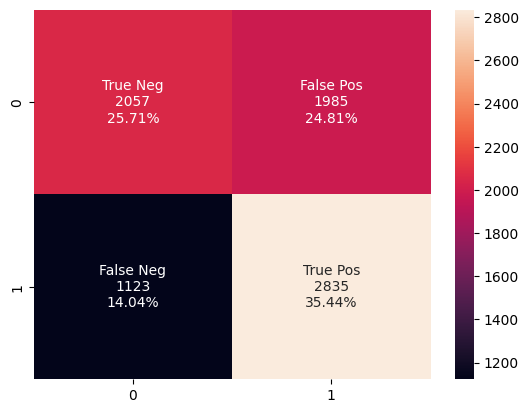

In [102]:
model_metrics(y_test, y_pred_mnb)

### Accuracy report

Out of three models our sentiment analysis problem was trained on, Multinomial Naive-Bayes showed highest accuracy

In [106]:
print('Accuracy score of Multinomial Naive-Bayes: ', \
      accuracy_score(y_test, y_pred_mnb))

Accuracy score of Multinomial Naive-Bayes:  0.6115


In [107]:
print('Accuracy score of Random Forest Classifier: ', \
      accuracy_score(y_test, y_pred_rfc))

Accuracy score of Random Forest Classifier:  0.60375


In [108]:
print('Accuracy score of Logistic Regression: ', \
      accuracy_score(y_test, y_pred))

Accuracy score of Logistic Regression:  0.60825
